<a href="https://colab.research.google.com/github/VarunKashyap19/Landmark-Detection-ML-/blob/main/Landmark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [4]:
samples = 20000
df = pd.read_csv("train.csv")
df = df.loc[:samples,:]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [5]:
print("Size of training data:", df.shape)
print("Number of unique classes:", num_classes)

Size of training data: (20001, 2)
Number of unique classes: 1020


In [6]:
data = pd.DataFrame(df['landmark_id'].value_counts())
#index the data frame
data.reset_index(inplace=True)
data.columns=['landmark_id','count']

print(data.head(10))
print(data.tail(10))

   landmark_id  count
0         1924    944
1           27    504
2          454    254
3         1346    244
4         1127    201
5          870    193
6         2185    177
7         1101    162
8          389    140
9          219    139
      landmark_id  count
1010         1404      2
1011         1403      2
1012          585      2
1013          604      2
1014          611      2
1015          625      2
1016         1250      2
1017         2239      2
1018          655      2
1019         1064      2


count    1020.000000
mean       19.608824
std        41.653684
min         2.000000
25%         5.000000
50%         9.000000
75%        21.000000
max       944.000000
Name: count, dtype: float64


Text(0, 0.5, 'Occurences')

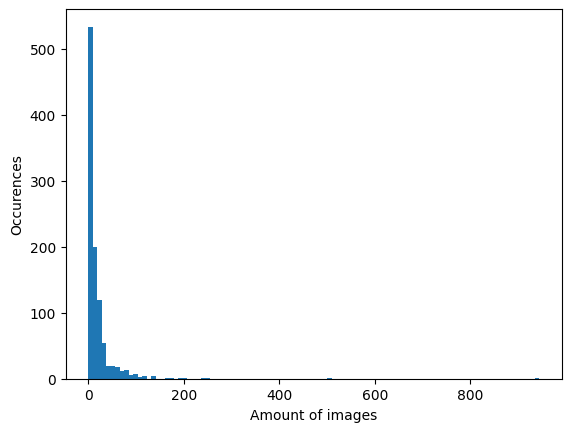

In [7]:
print(data['count'].describe())#statistical data for the distribution
plt.hist(data['count'],100,range = (0,944),label = 'test')#Histogram of the distribution
plt.xlabel("Amount of images")
plt.ylabel("Occurences")

Amount of classes with five and less datapoints: 322
Amount of classes with with between five and 10 datapoints: 342


Text(0, 0.5, 'Number of images')

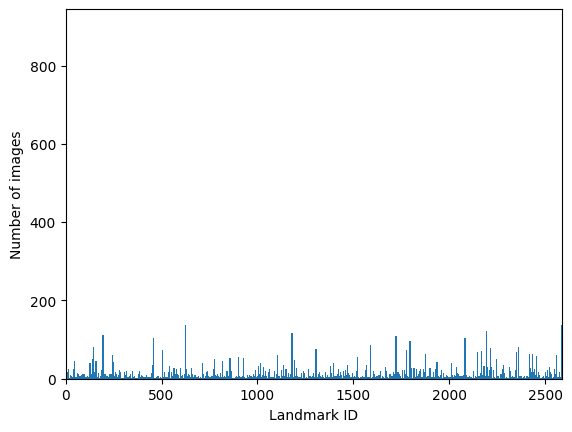

In [8]:
print("Amount of classes with five and less datapoints:", (data['count'].between(0,5)).sum())

print("Amount of classes with with between five and 10 datapoints:", (data['count'].between(5,10)).sum())

n = plt.hist(df["landmark_id"],bins=df["landmark_id"].unique())
freq_info = n[0]

plt.xlim(0,data['landmark_id'].max())
plt.ylim(0,data['count'].max())
plt.xlabel('Landmark ID')
plt.ylabel('Number of images')

In [11]:
from keras.applications import VGG19
from keras.layers import *
from keras import Sequential

### Parameters
# learning_rate   = 0.0001
# decay_speed     = 1e-6
# momentum        = 0.09

# loss_function   = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
#new_layer = Dense(num_classes, activation=activations.softmax, name='prediction')
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)


model = Sequential()
for layer in source_model.layers[:-1]: # go through until last layer
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
#     if layer == source_model.layers[-3]:
#         model.add(drop_layer)
# model.add(drop_layer2)
model.add(Dense(num_classes, activation="softmax"))
model.summary()


opt1 = keras.optimizers.RMSprop(learning_rate = 0.0001, momentum = 0.09)
opt2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=opt1,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

#sgd = SGD(lr=learning_rate, decay=decay_speed, momentum=momentum, nesterov=True)
# rms = keras.optimizers.RMSprop(lr=learning_rate, momentum=momentum)
# model.compile(optimizer=rms,
#               loss=loss_function,
#               metrics=["accuracy"])
# print("Model compiled! \n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        